___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', None)
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

## Exploratory Data Analysis and Visualization

In [2]:
df=pd.read_excel("Raisin_Dataset.xlsx")

In [10]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
156,45962,251.133384,235.368076,0.348730,47173,0.742280,810.195,Kecimen
145,69317,393.398997,228.722883,0.813617,72170,0.661674,1066.388,Kecimen
402,51304,350.042582,189.765438,0.840300,52949,0.660998,897.111,Kecimen
228,75799,340.982709,289.150470,0.530010,79230,0.741100,1065.191,Kecimen
44,77310,436.529899,228.280372,0.852367,80138,0.631721,1141.189,Kecimen
634,169645,731.561876,299.413405,0.912409,174278,0.755516,1753.016,Besni
366,69151,341.646058,258.392867,0.654205,70703,0.751846,989.917,Kecimen
232,84539,441.528890,248.374317,0.826775,87728,0.687577,1169.983,Kecimen
475,177264,619.958472,366.763240,0.806237,180994,0.683219,1652.694,Besni
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [4]:
# check null values and dtype of the columns
df.info()

# all independent features are numeric and dependent feature - target is object dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [5]:

# check main statistics
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [6]:
# Target Feature
# check the data is balanced or imbalanced

df.Class.value_counts()

# 1. it's a balanced dataset. In this case, we can use accuracy to evaluate the model.
# 2. Binary classification

Kecimen    450
Besni      450
Name: Class, dtype: int64

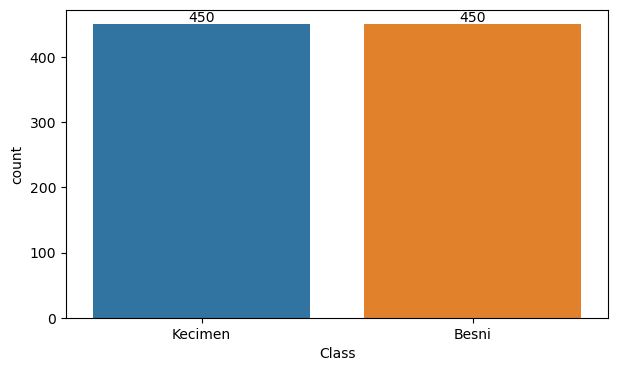

In [8]:
# plot the distribution

ax = sns.countplot(x='Class', data=df)
ax.bar_label(ax.containers[0]);

**Check the outliers**

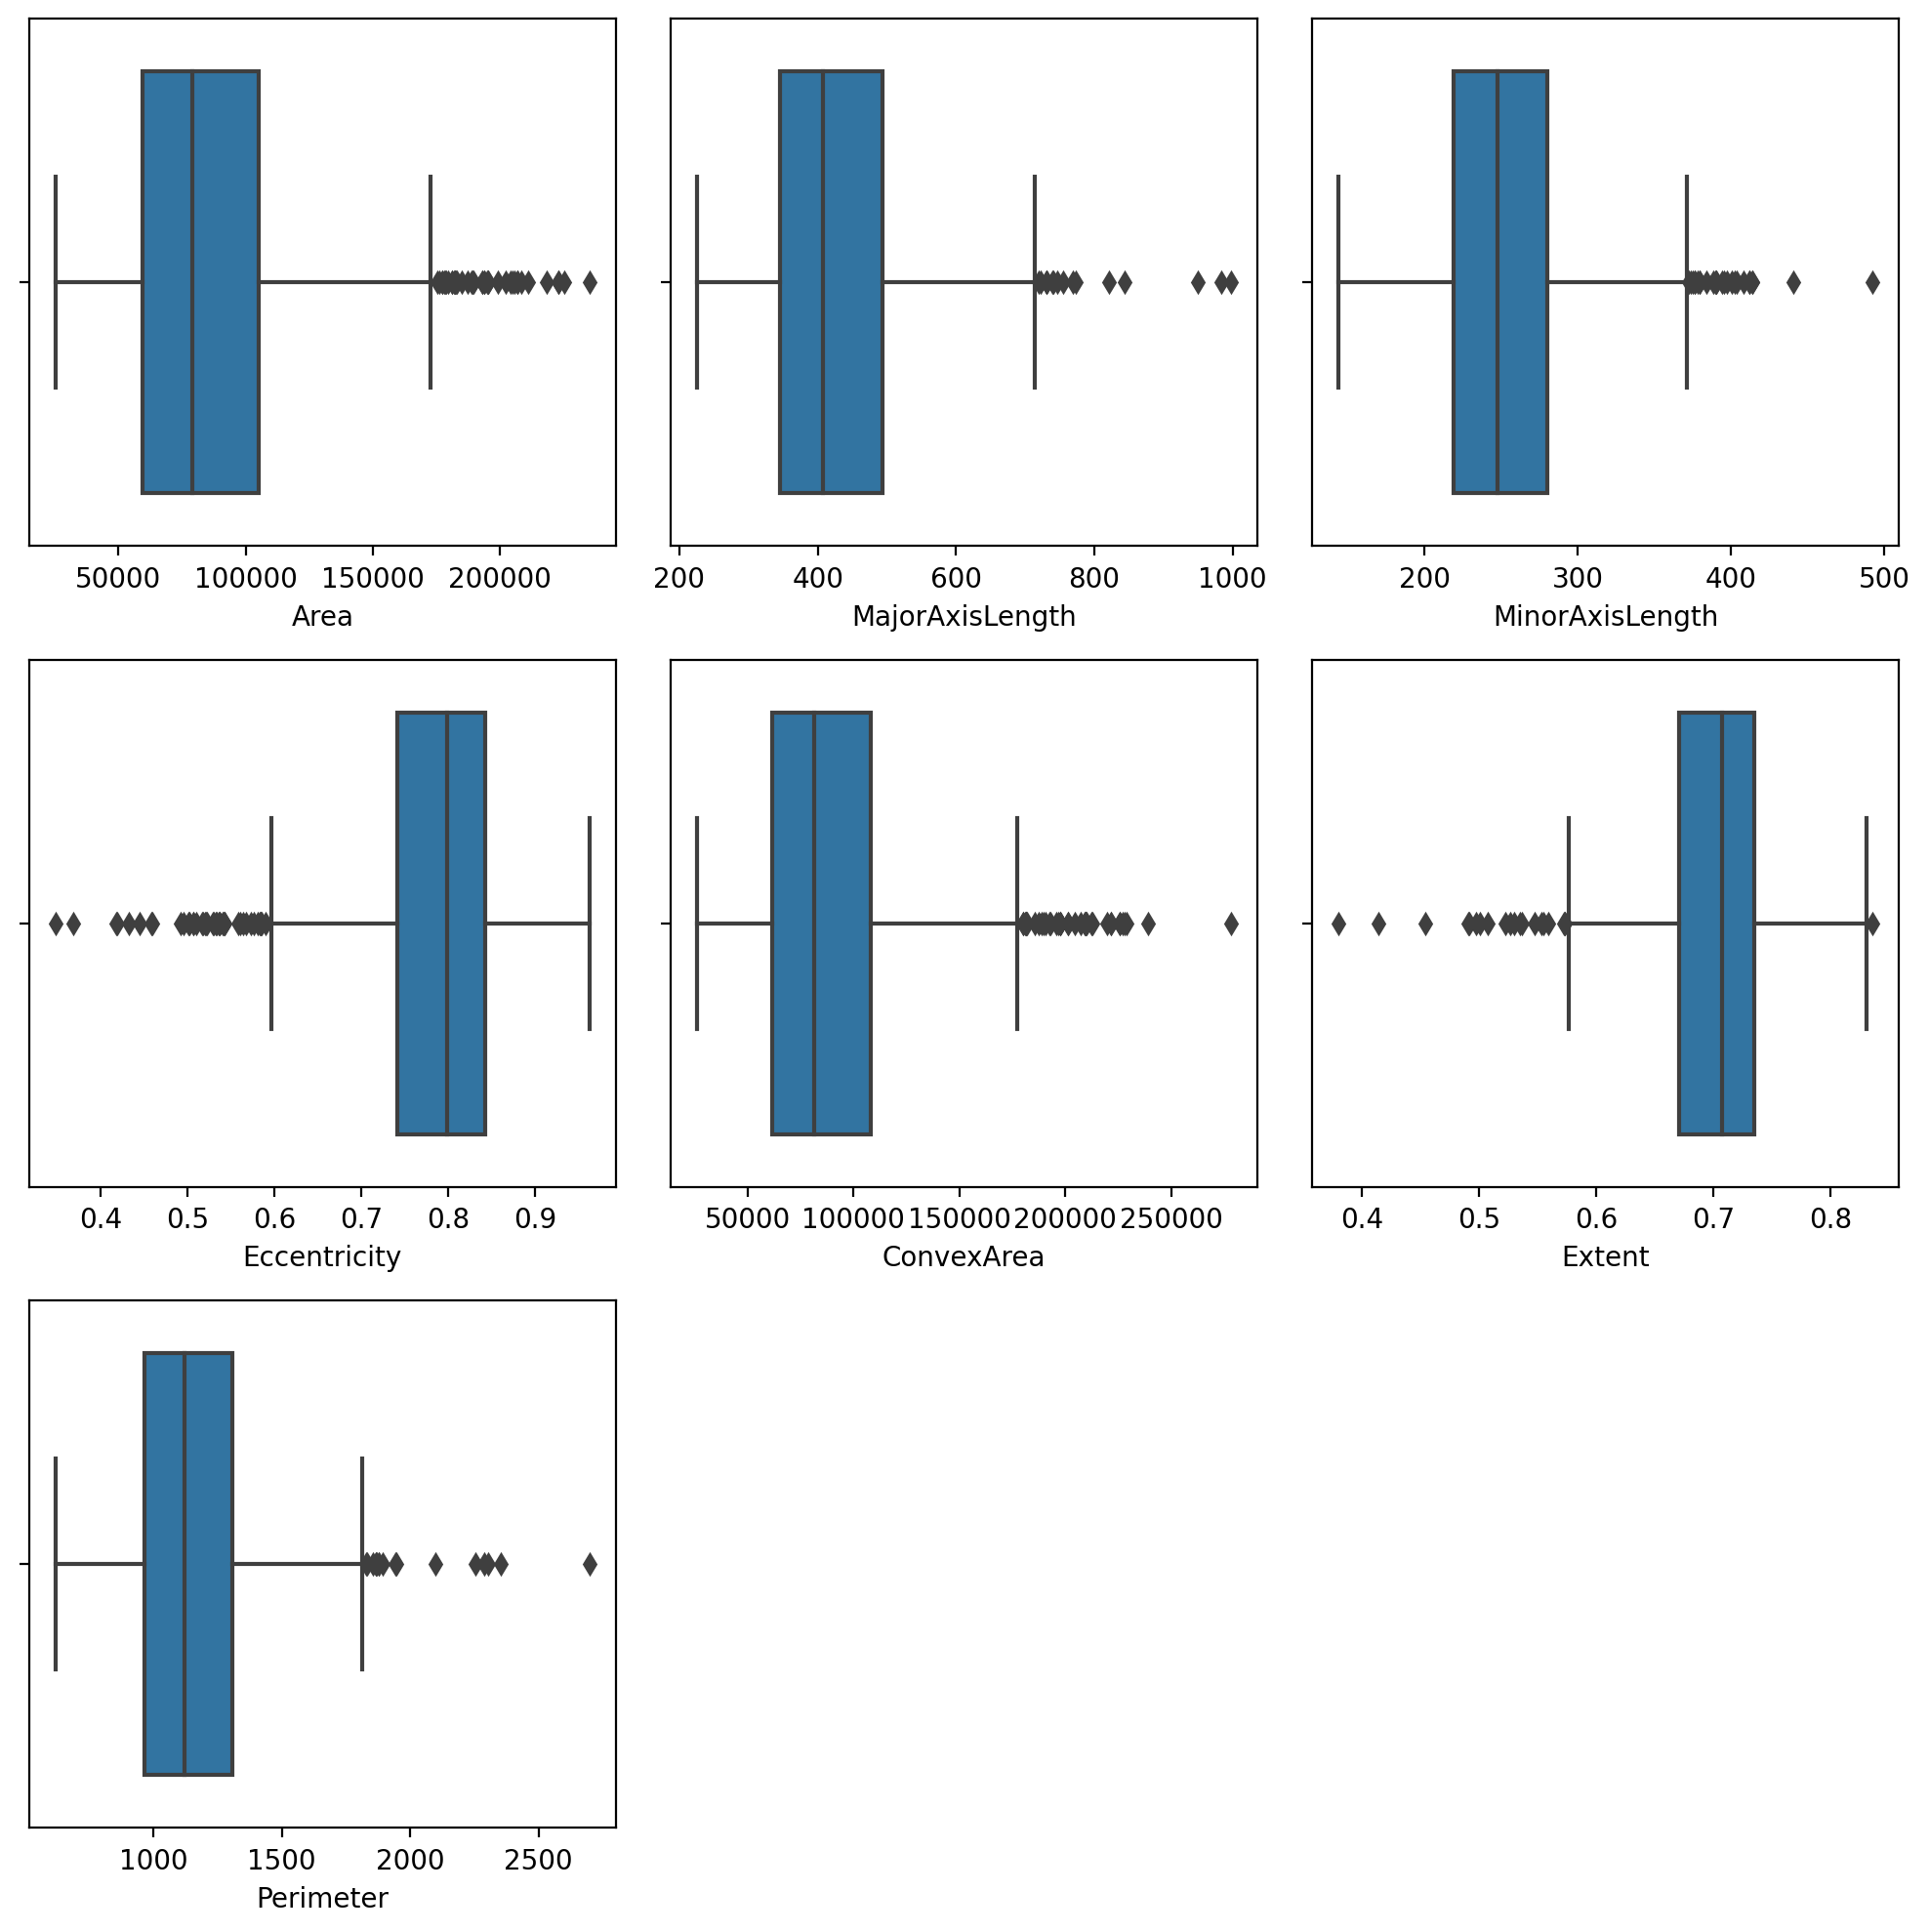

In [9]:
fig = plt.figure(figsize=(10,10), dpi=200)

for i, col in enumerate(df.select_dtypes(["float", "int"]).columns):
        plt.subplot(3,3,i+1)
        ax = sns.boxplot(x=df[col])
        
plt.tight_layout();

In [12]:
df[df.ConvexArea > 250000]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
487,210923,984.045491,367.279532,0.927737,278217,0.507352,2697.753,Besni


In [11]:
# As seen there are some data points which can be extreme invalid data for each feature. After getting the
# initial scores for the dataset, outliers will be decided to drop or leave them.

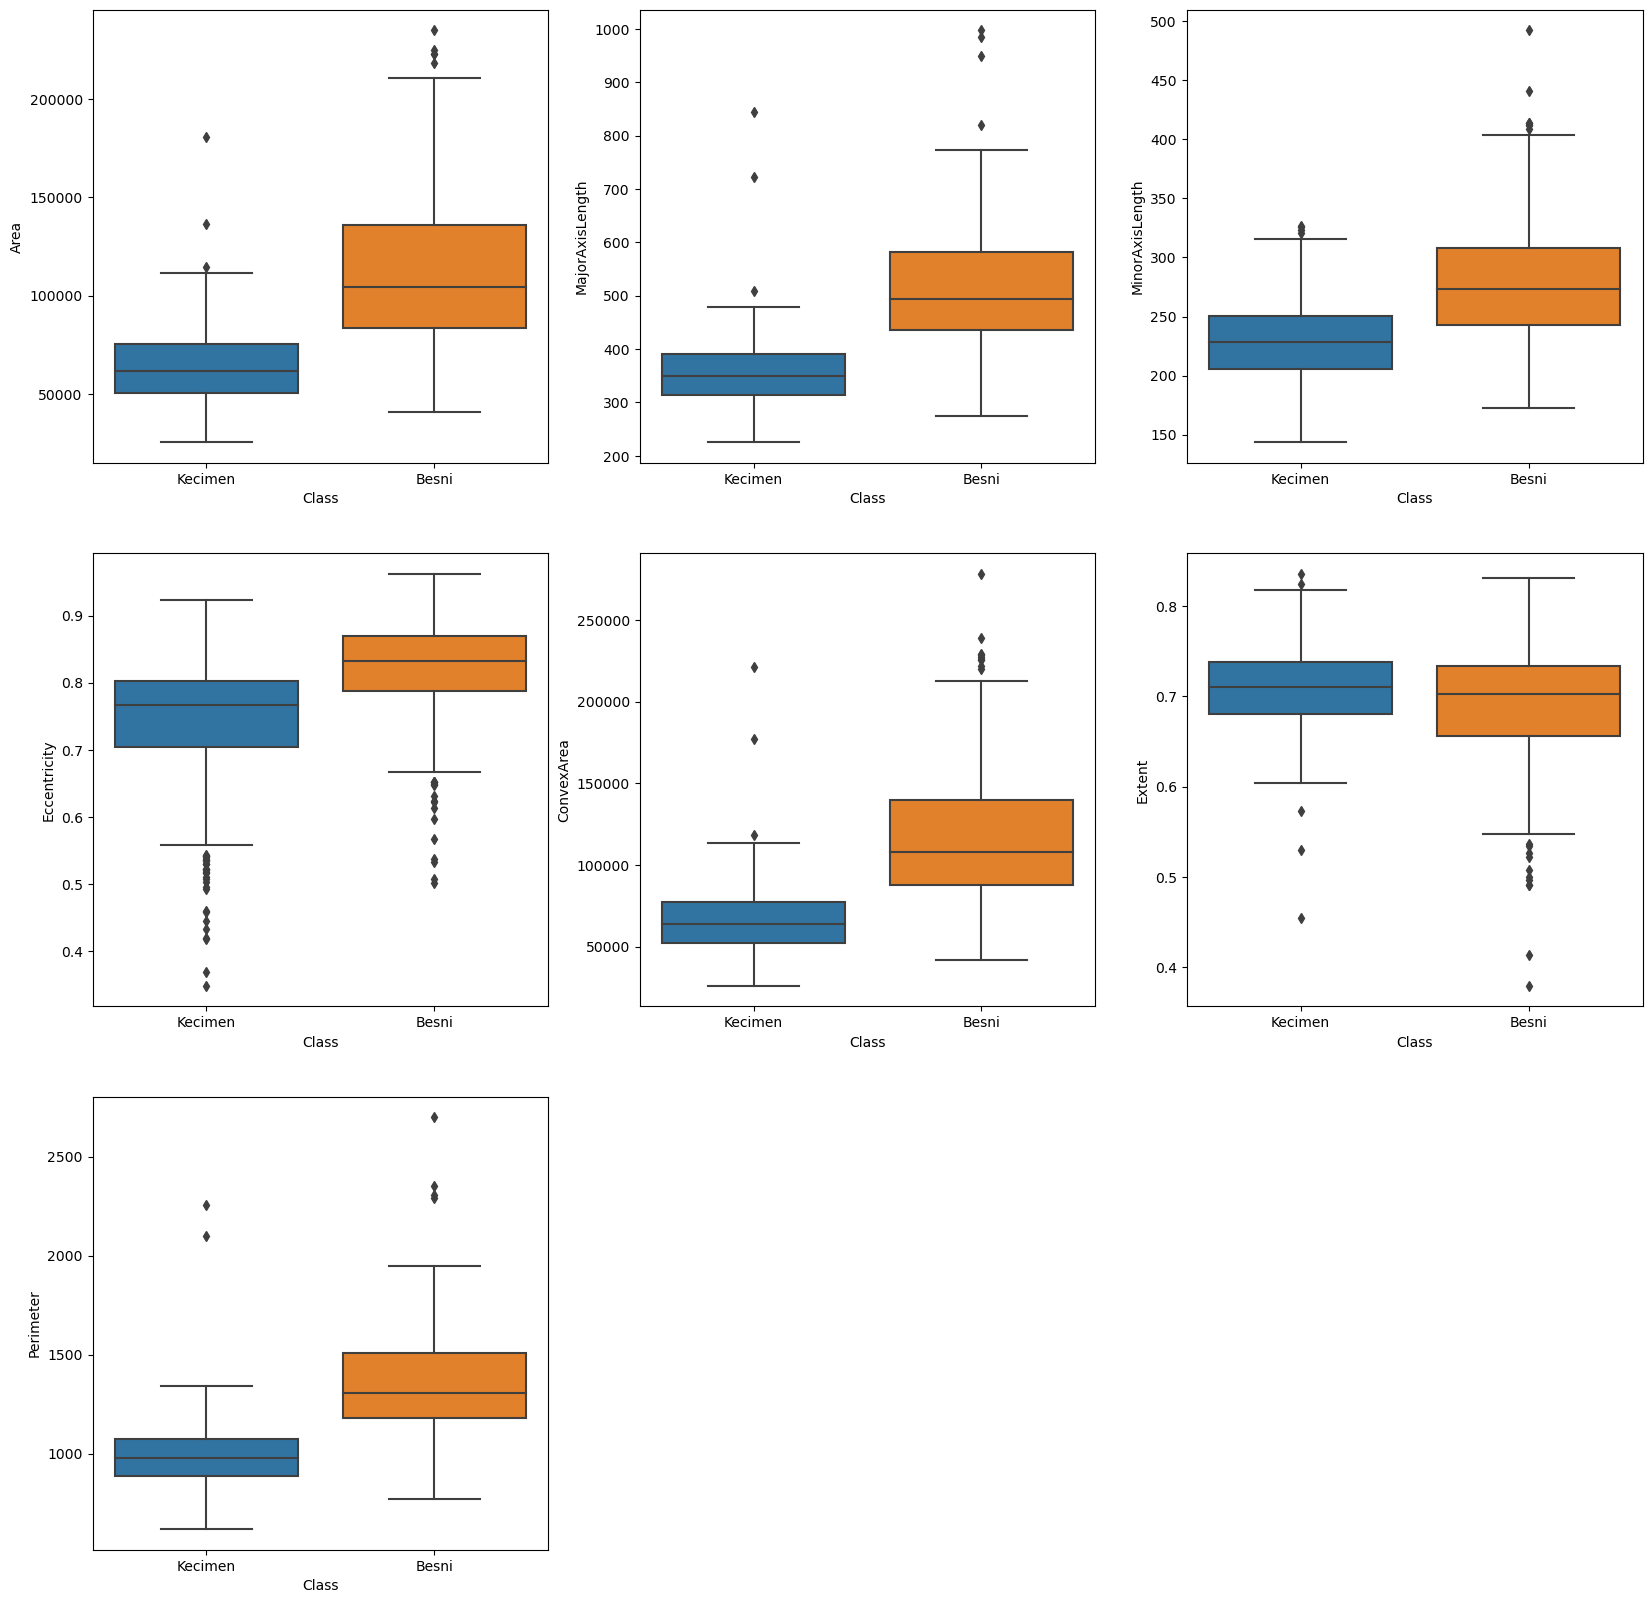

In [13]:
# check the outliers based on target feature

index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Class":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Class',y=feature, data=df)

**first insights:**

- higher the area and major axis lenght, it's more likely to be a Besni class
- eccetricity or extend don't have significant effect

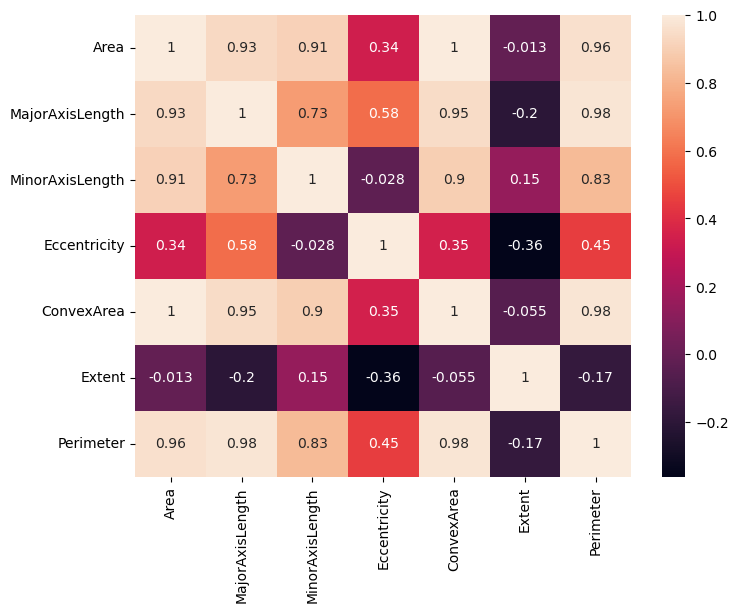

In [14]:
# check heatmap

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True);

# multicolinearity between area and major axis length; 
# area and minor axis length
# area and convex area
# area and perimeter
# major axis length and convex area 
# major axis length and perimeter
# minor axis length and convex area 
# perimeter and convex area

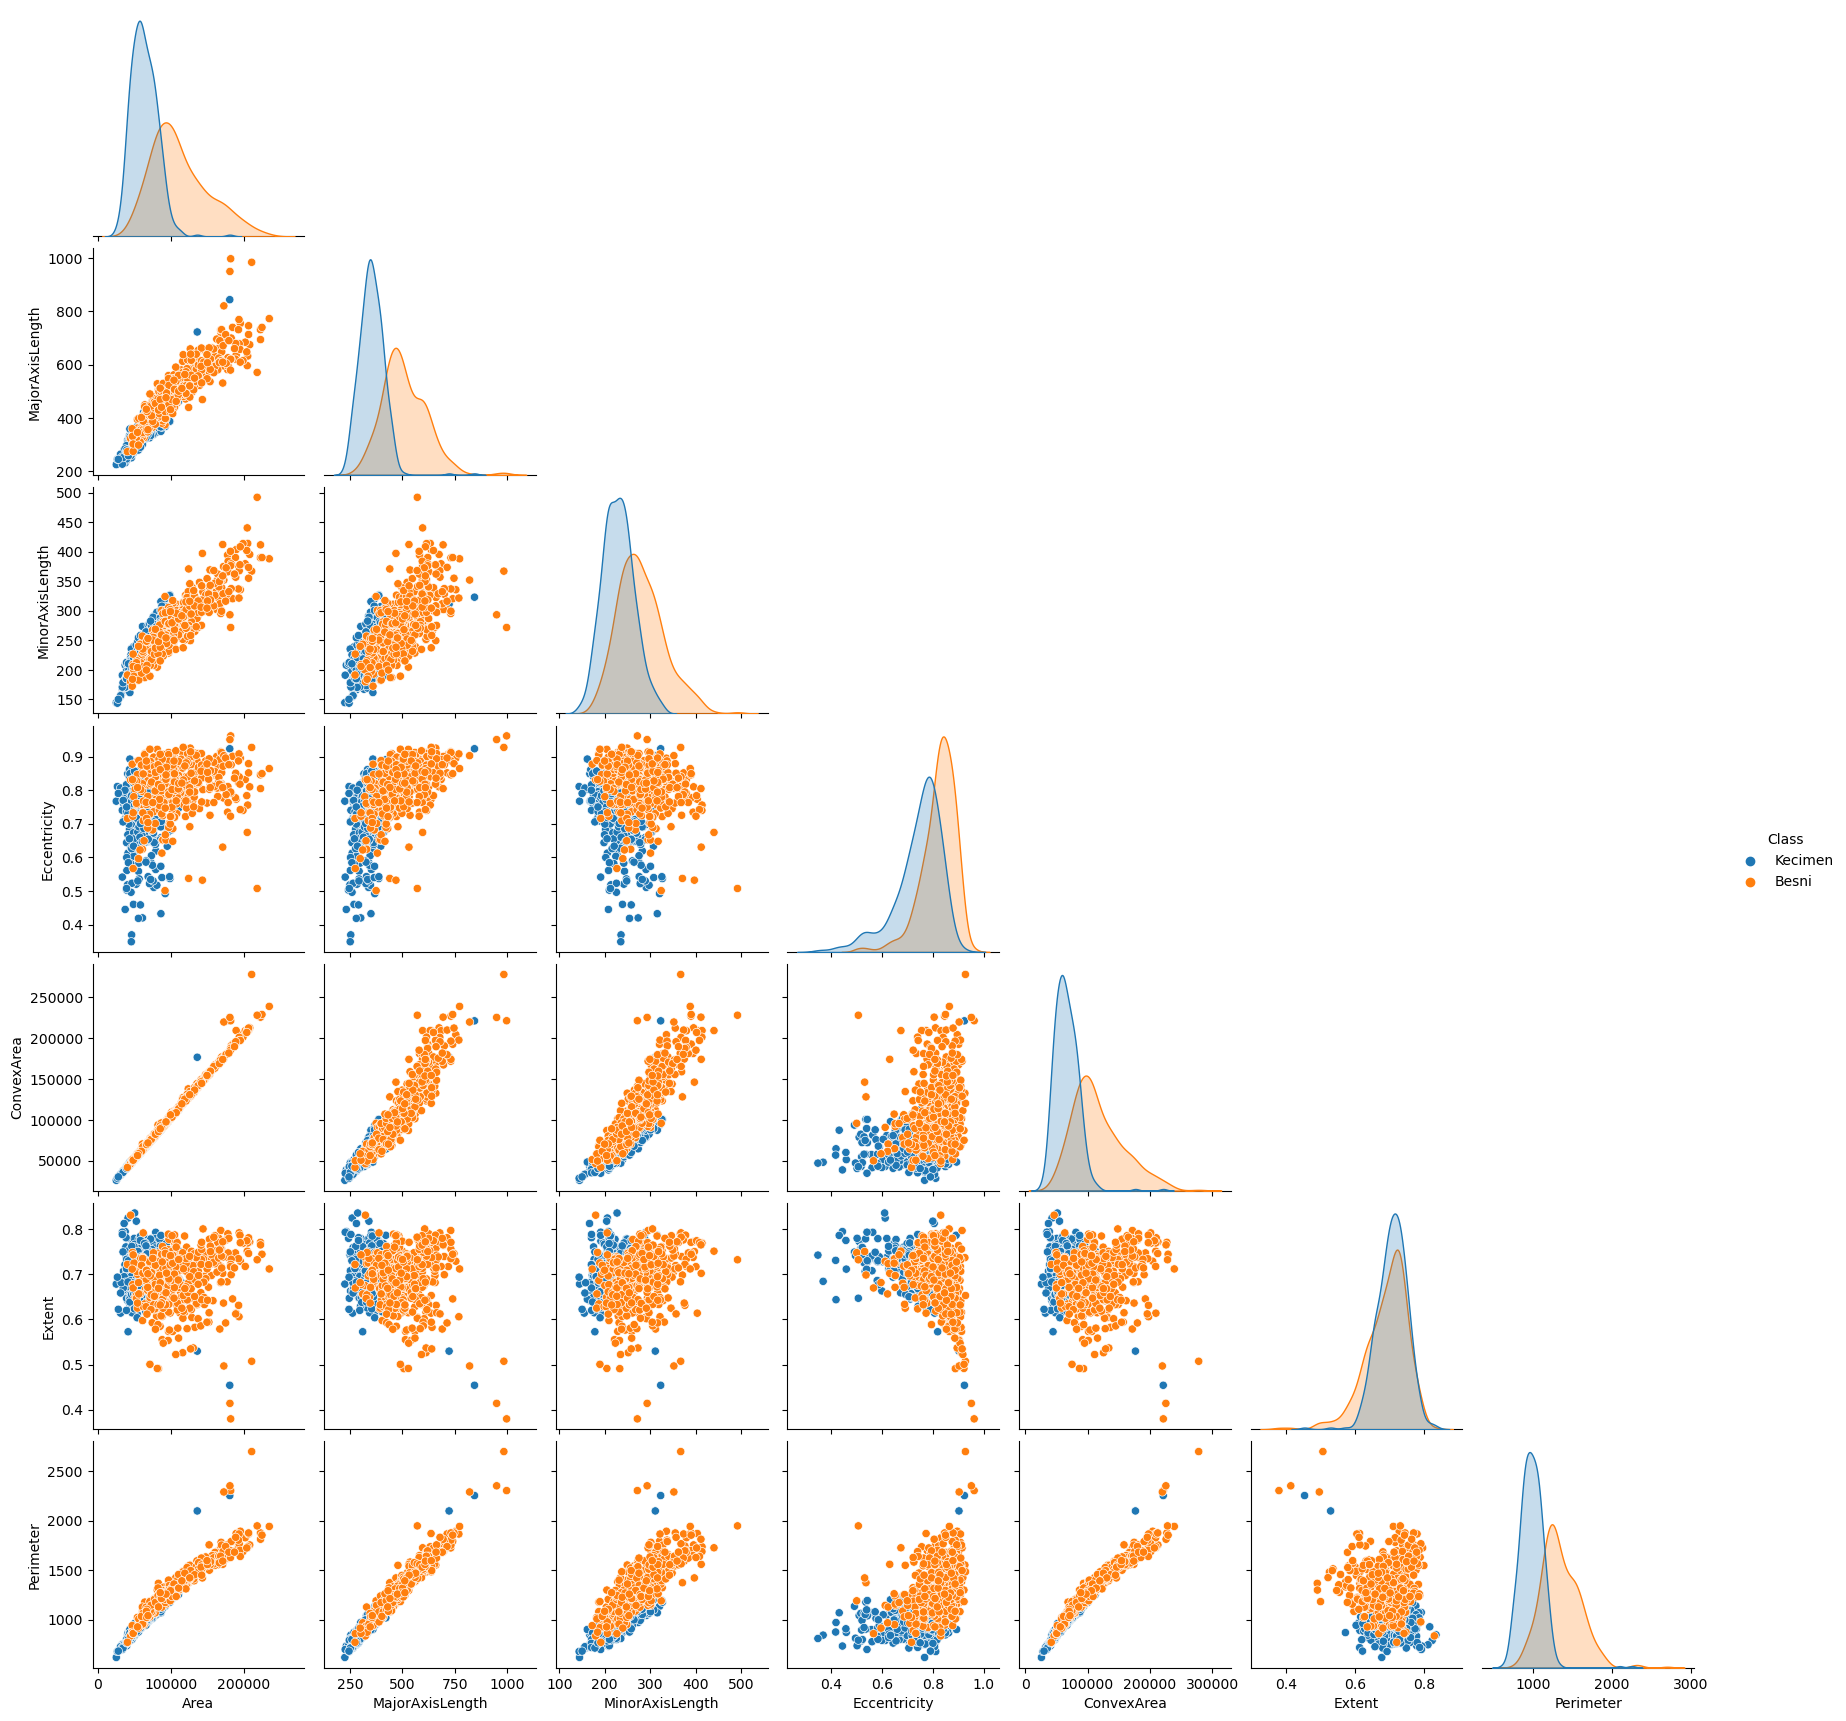

In [19]:
# check pairplot based on Class target feature
sns.pairplot(df,hue='Class', corner=True);

# the classes are generally distributed well and can be separated from each other except Extent

## Train | Test Split and Scaling

* for train_test_split use fallowing arguments:
    * train_size: 0.2
    * stratify: True
    * random_state: 10    
* Use StandardScaler to scale the data.

In [20]:
X=df.drop(["Class"], axis=1)
y=df["Class"]

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=10)

In [24]:
# check how the data is distributed to the train and test sets of the target feature
print(y.value_counts(normalize=True))
print()
print(y_train.value_counts(normalize=True))
print()
print(y_test.value_counts(normalize=True))

# distributions is the same with the original data

Kecimen    0.5
Besni      0.5
Name: Class, dtype: float64

Besni      0.5
Kecimen    0.5
Name: Class, dtype: float64

Besni      0.5
Kecimen    0.5
Name: Class, dtype: float64


# Logistic Regression

* Train the model using the training set with the default parameters.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [28]:
from sklearn.pipeline import Pipeline

In [72]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [73]:
y_pred = pipe_model.predict(X_test)

In [74]:
# probability for each classes
y_pred_proba = pipe_model.predict_proba(X_test)

In [75]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]  
test_data.sample(10)

# as a first 

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred,pred_proba
117,90176,390.207341,294.762239,0.655265,91793,0.762549,1136.669,Kecimen,Kecimen,0.725357
461,64391,449.555901,187.122378,0.909256,68813,0.634269,1177.714,Besni,Besni,0.208909
296,56327,297.765725,241.934426,0.582962,58178,0.727739,915.496,Kecimen,Kecimen,0.969295
95,38968,269.402021,185.727568,0.724374,40147,0.737583,769.242,Kecimen,Kecimen,0.983796
572,93234,452.926506,268.763054,0.804913,97428,0.715907,1222.886,Besni,Besni,0.275258
595,80481,481.063953,217.561151,0.891891,85153,0.714974,1219.105,Besni,Besni,0.180965
494,83555,457.546472,235.099871,0.857894,86694,0.711227,1159.779,Besni,Besni,0.311117
350,49604,310.605628,204.654587,0.752240,51007,0.760809,855.392,Kecimen,Kecimen,0.960658
258,73499,346.051082,275.513907,0.605079,76355,0.731246,1050.012,Kecimen,Kecimen,0.887692
535,77012,425.219427,239.469561,0.826343,81325,0.654280,1131.530,Besni,Besni,0.404146


## Model Performance
*Check the accuracy of the model using the train and test set by given eval_metric function.

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

In [76]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [77]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[75 15]
 [14 76]]
              precision    recall  f1-score   support

       Besni       0.84      0.83      0.84        90
     Kecimen       0.84      0.84      0.84        90

    accuracy                           0.84       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.84      0.84      0.84       180


Train_Set
[[307  53]
 [ 36 324]]
              precision    recall  f1-score   support

       Besni       0.90      0.85      0.87       360
     Kecimen       0.86      0.90      0.88       360

    accuracy                           0.88       720
   macro avg       0.88      0.88      0.88       720
weighted avg       0.88      0.88      0.88       720



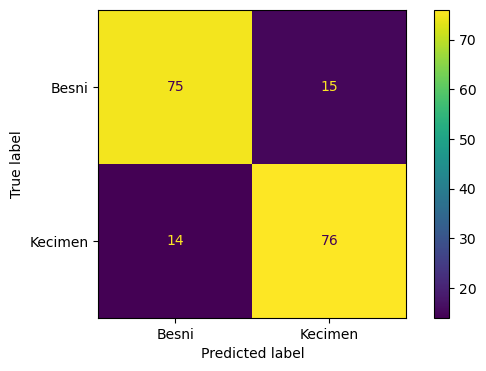

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(pipe_model,X_test, y_test)

**first insights**

In both train and test sets, the accuracy is reported to be 0.88 and 0.84 respectively, which means that the model classified 88% and 84% of the samples correctly on the train and test sets respectively.

Overall, the results suggest that the model has similar performance on both train and test sets, which is a good sign that the model is not overfitting to the training data. However, it is important to evaluate the model's performance on other evaluation metrics and using other techniques such as cross-validation to ensure its generalizability.

### Cross Validate

* Use the cross_val_score function to evaluate the model using the train set.

In [41]:
from sklearn.model_selection import cross_validate

In [42]:
# get the scores for evaluation
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [43]:
# scores for 1 class

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))

In [45]:
df_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,0.066208,0.013724,0.916667,0.873457,NaN,NaN,NaN,NaN,NaN,NaN
2,0.019824,0.004971,0.888889,0.875000,NaN,NaN,NaN,NaN,NaN,NaN
3,0.012501,0.004330,0.875000,0.875000,NaN,NaN,NaN,NaN,NaN,NaN
4,0.011615,0.005128,0.916667,0.868827,NaN,NaN,NaN,NaN,NaN,NaN
5,0.011757,0.004479,0.833333,0.882716,NaN,NaN,NaN,NaN,NaN,NaN
6,0.012087,0.005092,0.861111,0.876543,NaN,NaN,NaN,NaN,NaN,NaN
7,0.011423,0.005204,0.888889,0.876543,NaN,NaN,NaN,NaN,NaN,NaN
8,0.008571,0.003989,0.847222,0.881173,NaN,NaN,NaN,NaN,NaN,NaN
9,0.013790,0.004599,0.847222,0.881173,NaN,NaN,NaN,NaN,NaN,NaN
10,0.011172,0.005231,0.902778,0.876543,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_scores.mean()[2:]

test_accuracy      0.877778
train_accuracy     0.876698
test_precision          NaN
train_precision         NaN
test_recall             NaN
train_recall            NaN
test_f1                 NaN
train_f1                NaN
dtype: float64

In [47]:
# correct the results for NAN values

from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, pos_label='Kecimen'),
           'recall': make_scorer(recall_score, pos_label='Kecimen'),
           'f1': make_scorer(f1_score, pos_label='Kecimen')}

scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=10, return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy      0.877778
train_accuracy     0.876698
test_precision     0.862529
train_precision    0.857393
test_recall        0.902778
train_recall       0.903704
test_f1            0.880419
train_f1           0.879934
dtype: float64

In [48]:
# final scores

eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[75 15]
 [14 76]]
              precision    recall  f1-score   support

       Besni       0.84      0.83      0.84        90
     Kecimen       0.84      0.84      0.84        90

    accuracy                           0.84       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.84      0.84      0.84       180


Train_Set
[[307  53]
 [ 36 324]]
              precision    recall  f1-score   support

       Besni       0.90      0.85      0.87       360
     Kecimen       0.86      0.90      0.88       360

    accuracy                           0.88       720
   macro avg       0.88      0.88      0.88       720
weighted avg       0.88      0.88      0.88       720



**How can we interpret the scores in terms of accuracy and a potential overfitting situation**

Based on the cross-validation results, it seems that the model has good performance on the training set, with accuracy scores around 0.88, precision scores around 0.88-0.90, recall scores around 0.85-0.90, and F1 scores around 0.87-0.88.

However, on the test set, the performance seems to be slightly lower, with an accuracy score of 0.84 and precision, recall, and F1 scores around 0.84. This suggests that the model may be overfitting to the training data, and may not generalize well to new, unseen data.

# Cross Validate for 0 class

In [52]:
f1_0 = make_scorer(f1_score, pos_label = "Besni")
precision_0 = make_scorer(precision_score, pos_label = "Besni")
recall_0 = make_scorer(recall_score, pos_label ="Besni")



scoring = {"precision_0":precision_0, "recall_0":recall_0, "f1_0":f1_0}

In [54]:
from sklearn.model_selection import StratifiedKFold


operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=10) # her iterasyonda train ve test setlerinin birbirlerine olan oranlarına göre tüm 
                                  # iterasyonlarda ayrışım yapar.

scores = cross_validate(model, X_train, y_train, scoring = scoring, 
                        cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1,11))

df_scores.mean()[2:]


# No overfitting

test_precision_0     0.900993
train_precision_0    0.898231
test_recall_0        0.852778
train_recall_0       0.849691
test_f1_0            0.874466
train_f1_0           0.873280
dtype: float64

In [55]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)
# These scores indicate that the model performs reasonably well in identifying the Besni class, with precision, 
# recall, and F1-score all around 0.84. 

Test_Set
[[75 15]
 [14 76]]
              precision    recall  f1-score   support

       Besni       0.84      0.83      0.84        90
     Kecimen       0.84      0.84      0.84        90

    accuracy                           0.84       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.84      0.84      0.84       180


Train_Set
[[307  53]
 [ 36 324]]
              precision    recall  f1-score   support

       Besni       0.90      0.85      0.87       360
     Kecimen       0.86      0.90      0.88       360

    accuracy                           0.88       720
   macro avg       0.88      0.88      0.88       720
weighted avg       0.88      0.88      0.88       720



### GridSearchCV
* Use the GridSearchCV function to find the best parameters for the model.

In [56]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(max_iter=5000))]
 
model = Pipeline(steps=operations)

In [57]:
model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('logistic', LogisticRegression(max_iter=5000))],
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(max_iter=5000),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 5000,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [61]:
from sklearn.model_selection import GridSearchCV

model = Pipeline(steps=operations) 

penalty = ["l1", "l2"] 

C = np.logspace(-1, 5, 20) 

class_weight= ["balanced", None] 

solver = ["lbfgs", "liblinear", "sag", "saga"] 

param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : [C,1],
              "logistic__class_weight":class_weight,
              "logistic__solver":solver} 


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = 'accuracy',       
                          n_jobs = -1) 

In [62]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(max_iter=5000))]),
             n_jobs=-1,
             param_grid={'logistic__C': [array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                                         1],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['lbfgs', 'liblinear', 'sag',
                                              'saga']},
             scoring='accuracy')

In [63]:
grid_model.best_params_

{'logistic__C': 1,
 'logistic__class_weight': 'balanced',
 'logistic__penalty': 'l2',
 'logistic__solver': 'lbfgs'}

In [64]:
grid_model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=5000))])

In [66]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[75 15]
 [14 76]]
              precision    recall  f1-score   support

       Besni       0.84      0.83      0.84        90
     Kecimen       0.84      0.84      0.84        90

    accuracy                           0.84       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.84      0.84      0.84       180


Train_Set
[[307  53]
 [ 36 324]]
              precision    recall  f1-score   support

       Besni       0.90      0.85      0.87       360
     Kecimen       0.86      0.90      0.88       360

    accuracy                           0.88       720
   macro avg       0.88      0.88      0.88       720
weighted avg       0.88      0.88      0.88       720



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

* Use the roc_curve function to calculate the ROC curve and compare logistic regression models with default and tuned parameters. 

Purpose of ROC Curve:

1. Analysing the strength/predictive power of a classifier.

2. Determining optimal threshold.

3. Comparing two models (using Area Under the Curve).
AUC represents a degree or measure of separability. It tells us how much the model is capable of distinguishing between classes.

In [67]:
from sklearn.metrics import roc_auc_score, auc, roc_curve, RocCurveDisplay, PrecisionRecallDisplay

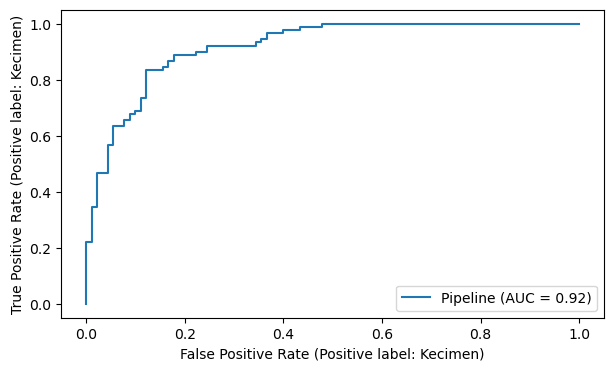

In [68]:
#plot_roc_curve(pipe_model, X_test, y_test);
RocCurveDisplay.from_estimator(pipe_model, X_test, y_test)

# For pipe-model, a 0.92 AUC score means the model performs well to distinguigh the classes from each other

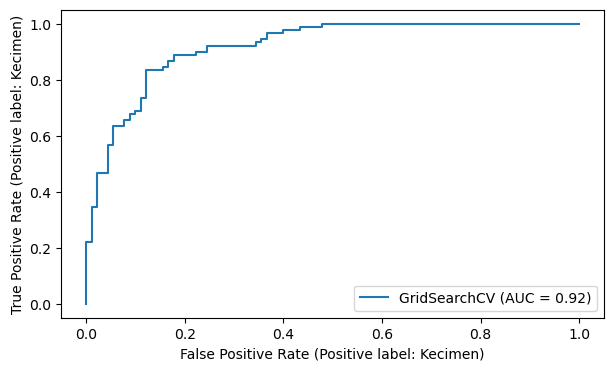

In [71]:
# roc - auc for grid search model

RocCurveDisplay.from_estimator(grid_model, X_test, y_test)

# same with pipe-model

## KNN (K-Nearest Neighbors)
* Train the model using the training set with the default parameters.

### Elbow Method for Choosing Reasonable K Values
* Use the elbow method to find the optimal number of neighbors.

### Scores by Various K Values
* Select some k values smaller and bigger than the optimal k value to see how the model performs.

### Cross Validate
* Use the cross_val_score function to evaluate the model using the train set. Use optimal k value which you found in the elbow method.


### Gridsearch Method for Choosing Reasonable K Values
* Use the GridSearchCV function to find the best parameters for the model. this method is brute force method to find the best parameters, and it takes a long time to run for KNN. You will get different k values because of you will use different parameters, and also gridsearch method tries to find minimum error. Sometimes it get larger k values for optimal but for  sake of reduce complexity we use the elbow method to find the optimal k value.

### Evaluating ROC Curves and AUC
*Use the roc_curve function to calculate the ROC curve and compare KNN models with default and tuned parameters.

# Conclusion 
* Write a short summary of your findings, and decide which model you will use and why.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___